In [252]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [253]:
df = pd.read_csv("perf.384sentences.fairseq.wmt14.en-fr.fconv.dim256.csv", index_col=[0, 1])

Text(0,0.5,'average rank')

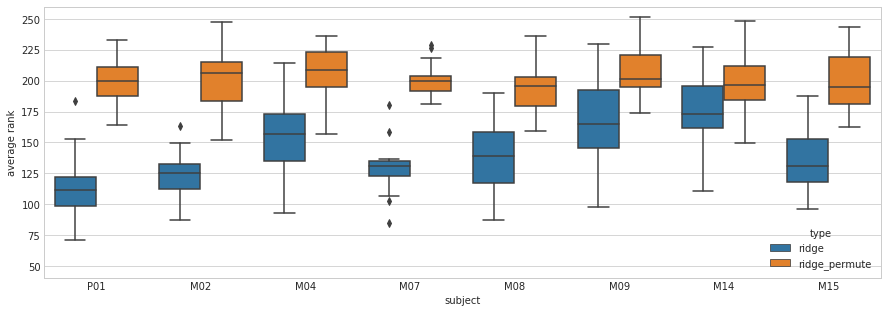

In [254]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="subject", y="value", hue="type", data=df.reset_index().melt(id_vars=["subject", "type"], value_vars=["mar_fold_%i" % i for i in range(18)]), ax=ax)
plt.ylim((40, 260))
plt.ylabel("average rank")

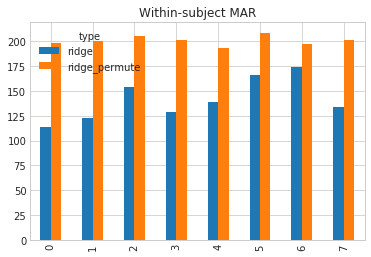

In [255]:
subj_perf = df.groupby("type").apply(lambda sub_df: sub_df.reset_index(drop=True).mean(axis=1)).T
subj_perf.plot.bar(title="Within-subject MAR")

In [256]:
fairseq_stats = subj_perf.agg(["mean", "sem"])
fairseq_stats

,ridge,ridge_permute
mean,141.628968,200.717923
sem,7.497662,1.670000


In [257]:
df = pd.read_csv("perf.384sentences.infersent.allnli.dim256.csv", index_col=[0, 1])

Text(0,0.5,'average rank')

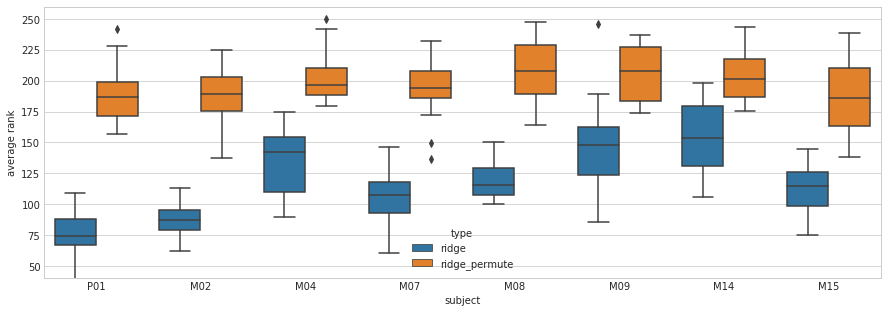

In [258]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="subject", y="value", hue="type", data=df.reset_index().melt(id_vars=["subject", "type"], value_vars=["mar_fold_%i" % i for i in range(18)]), ax=ax)
plt.ylim((40, 260))
plt.ylabel("average rank")

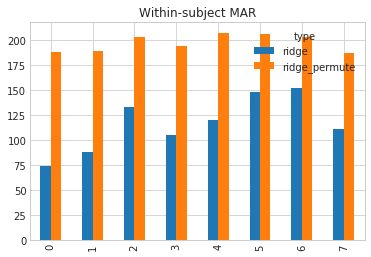

In [259]:
subj_perf = df.groupby("type").apply(lambda sub_df: sub_df.reset_index(drop=True).mean(axis=1)).T
subj_perf.plot.bar(title="Within-subject MAR")

In [260]:
infersent_stats = subj_perf.agg(["mean", "sem"])
infersent_stats

,ridge,ridge_permute
mean,116.201058,196.903108
sem,9.730405,3.006739


-------------

In [261]:
fairseq_stats = fairseq_stats.assign(target="fairseq").reset_index().set_index(["target", "index"])
infersent_stats = infersent_stats.assign(target="infersent").reset_index().set_index(["target", "index"])

Text(0.5,1,'Decoding performance with different model targets')

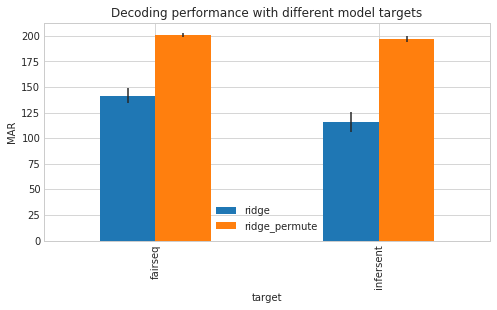

In [267]:
fig, ax = plt.subplots(figsize=(8,4))
f = fairseq_stats.append(infersent_stats).reset_index(1)
means = f[f["index"] == "mean"][["ridge", "ridge_permute"]]
stderrs = f[f["index"] == "sem"][["ridge", "ridge_permute"]]
means.plot.bar(yerr=stderrs, ax=ax)
plt.ylabel("MAR")
plt.title("Decoding performance with different model targets")